In [5]:
import jax
import numpy as np
import jax.numpy as jnp
import equinox as eqx
import diffrax
import matplotlib.pyplot as plt
%matplotlib widget

jax.config.update("jax_enable_x64", True)
# jax.config.update('jax_platform_name', 'cpu')
# jax.config.update("jax_debug_nans", True)
# jax.config.update("jax_disable_jit", True)

from pylinger_background import evolve_background
from pylinger_perturbations import evolve_one_mode, evolve_perturbations

In [6]:
## Cosmological Parameters
Tcmb = 2.7255
YHe = 0.248
Omegam = 0.276
Omegab = 0.0455
OmegaL = 1.0-Omegam
num_massive_neutrinos = 1
mnu=0.06 #eV
Neff=2.046 # -1 if massive neutrino present
standard_neutrino_neff=Neff+num_massive_neutrinos
h = 0.703
A_s = 2.1e-9
n_s = 0.965
k_p = 0.05

In [7]:
# @eqx.filter_jit
def f_of_Omegam( args ):
    param = {}
    param['Omegam'] = args[0]
    param['Omegab'] = args[1]
    param['OmegaL'] = OmegaL
    param['Omegak'] = 0.0
    param['A_s'] = A_s
    param['n_s'] = n_s
    param['H0'] = 100*h
    param['Tcmb'] = Tcmb
    param['YHe'] = YHe
    param['Neff'] = Neff
    param['Nmnu'] = num_massive_neutrinos
    param['mnu'] = mnu
    param = evolve_background(param=param)
    
    k = 1e-2

    # Compute Perturbations
    lmaxg  = 12
    lmaxgp = 12
    lmaxr  = 17
    lmaxnu = 17
    nqmax  = 15

    rtol   = 1e-3
    atol   = 1e-4

    # Compute Perturbations
    nmodes = 128
    kmin = 1e-5
    kmax = 1e1
    # aexp_out = jnp.array([1e-2,1e-1]) 
    aexp_out = jnp.geomspace(1e-2,1,2)

    y, kmodes = evolve_perturbations( param=param, kmin=kmin, kmax=kmax, num_k=nmodes, aexp_out=aexp_out )

    
    return y

In [8]:
k  = jnp.geomspace(1e-5,1e1,128)
dy = jax.jacfwd(f_of_Omegam)([Omegam,Omegab])

Text(0.5, 1.0, '$d \\delta / d\\Omega_b$')

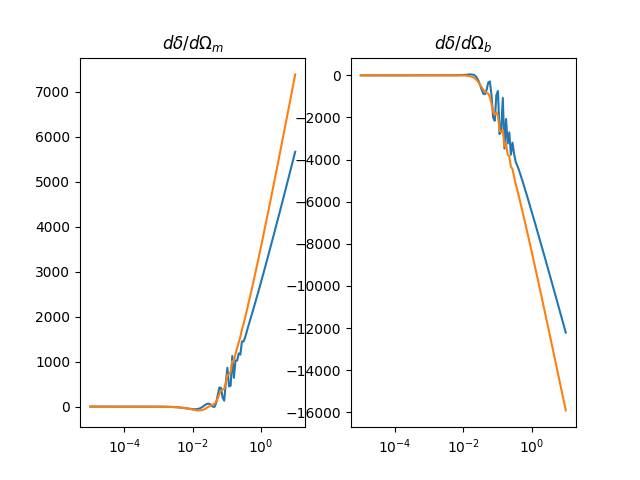

In [26]:
fig,ax = plt.subplots(1,2)
ax[0].semilogx(k, dy[0][:,0,5])
ax[0].semilogx(k, dy[0][:,0,3])
ax[0].set_title('$d \\delta / d\\Omega_m$')

ax[1].semilogx(k, dy[1][:,0,5])
ax[1].semilogx(k, dy[1][:,0,3])
ax[1].set_title('$d \\delta / d\\Omega_b$')